In [68]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import scale, normalize
from IPython.display import display

df = pd.read_csv("final2.csv")

In [12]:
def basic_ana(df):
	df = df.sort_values("likesCount", ascending=False)
	display(df.head())

In [16]:
basic_ana(df)

,id,title,likesCount,duration,viewCount,caption,thumbnailPopularity,categoryID,descriptionLinkCount,googleTrends,...,redditComments,twitterHits,twitterCountries,facebookShares,commentCount,commentAnger,commentDisgust,commentFear,commentJoy,commentSadness
130,_GuOjXYl5ew,YouTube Rewind: The Ultimate 2016 Challenge | ...,2866713,413,179114340,1,107,25,84,0,...,32.868293,2.377043,0.129187,9823.849666,612112,0.440808,0.267736,0.011072,0.001313,0.395430
163,34Na4j8AVgA,The Weeknd - Starboy (official) ft. Daft Punk,2712316,274,494735612,1,70,10,7,2251,...,1.132910,0.183977,0.018398,27036.643331,199316,0.235497,0.005447,0.051384,0.194071,0.529847
15,b8m9zhNAgKs,Rae Sremmurd - Black Beatles ft. Gucci Mane,2617736,294,310274178,1,36,10,8,1173,...,2.864028,0.130805,0.026161,10127.649331,124234,0.643680,0.081854,0.007191,0.080753,0.276527
219,7Vj5M0qKh8g,THE RUBY PLAYBUTTON / YouTube 50 Mil Sub Rewar...,2596805,609,25476894,1,7,24,1,3403,...,7.115378,0.721996,0.036100,203.685178,506195,0.480035,0.111969,0.004639,0.276755,0.061782
14,6Mgqbai3fKo,Shakira - Chantaje (Official video) ft. Maluma,1984740,200,392420994,0,27,10,13,3567,...,0.173841,0.346775,0.052016,42669.289095,130041,0.047219,0.013024,0.000244,0.872947,0.037389


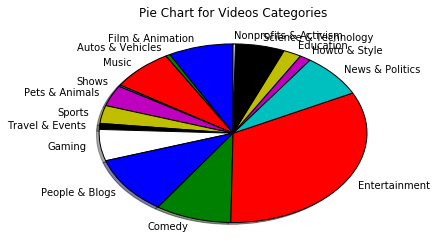

In [100]:
def piechartCategoryID(df):
    categoryIDs = {"1":"Film & Animation ","2":"Autos & Vehicles","10":"Music","15":"Pets & Animals","17":"Sports","18":"Short Movies","19":"Travel & Events","20":"Gaming","21":"Videoblogging","22":"People & Blogs","23":"Comedy","24":"Entertainment","25":"News & Politics","26":"Howto & Style","27":"Education","28":"Science & Technology","29":"Nonprofits & Activism","30":"Movies","31":"Anime/Animation","32":"Action/Adventure","33":"Classics","34":"Comedy","35":"Documentary","36":"Drama","37":"Family","38":"Foreign","39":"Horror","40":"Sci-Fi/Fantasy","41":"Thriller","42":"Shorts","43":"Shows","44":"Trailers"}
    categories = df["categoryID"].values
    counts = Counter(categories)
    labels = []
    sizes = []
    for label, size in counts.items():
        labels.append(categoryIDs[str(label)])
        sizes.append(size)
    plt.pie(sizes, labels=labels, startangle=90, shadow = True, counterclock=True)
    plt.title("Pie Chart for Videos Categories")
    plt.show()
piechartCategoryID(df)

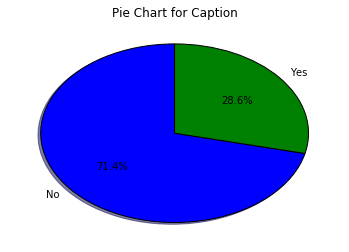

In [101]:
def piechartCaption(df):
    captions = {"0.0":"No", "1.0":"Yes"}
    caps = df["caption"].values
    counts = Counter(caps)
    labels = []
    sizes = []
    for label, size in counts.items():
        labels.append(captions[str(label)])
        sizes.append(size)
    plt.pie(sizes, labels=labels, startangle=90, shadow = True, counterclock=True, autopct='%1.1f%%')
    plt.title("Pie Chart for Caption")
    plt.show()
piechartCaption(df)

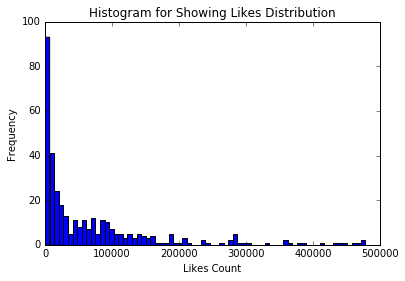

In [102]:
def LikesHistogram(df):
    df = df[df.likesCount < 500000]
    likes = df["likesCount"]
    plt.hist(likes, bins=70)
    plt.xlabel('Likes Count')
    plt.ylabel('Frequency')
    plt.title("Histogram for Showing Likes Distribution")
    plt.show()
LikesHistogram(df)

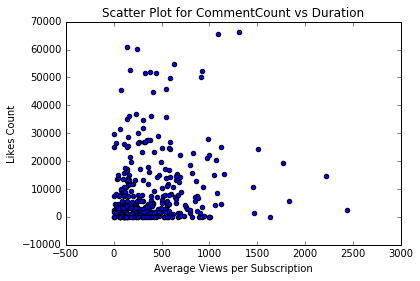

In [103]:
def commentsVSDurationScatter(df):
    viewsPerSub = df["commentCount"].values
    likes = df["duration"].values
    vl = []
    ll = []
    for v,l in zip(viewsPerSub,likes):
        if v<73000 and l<3000:
            vl.append(v)
            ll.append(l)
    plt.scatter(ll, vl)
    plt.xlabel('Average Views per Subscription')
    plt.ylabel('Likes Count')
    plt.title("Scatter Plot for CommentCount vs Duration")
    plt.show()
commentsVSDurationScatter(df)

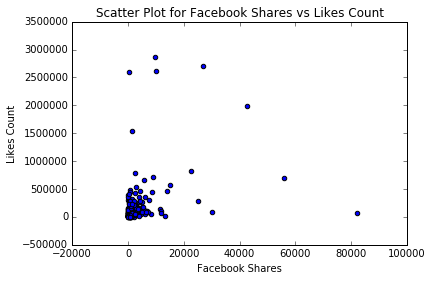

In [112]:
def facebookCorelation(df):
    df = df[df.facebookShares > 100]
    facebook = df["facebookShares"]
    likes = df["likesCount"]
    vl = []
    ll = []
    for v,l in zip(facebook,likes):
        if v<27000 and l<100000:
            vl.append(v)
            ll.append(l)
    plt.scatter(facebook, likes)
    plt.xlabel('Facebook Shares')
    plt.ylabel('Likes Count')
    plt.title("Scatter Plot for Facebook Shares vs Likes Count")
    plt.show()
facebookCorelation(df)

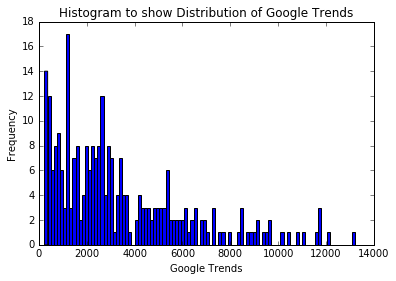

In [115]:
def googleTrendsHistogram(df):
    df = df[df.googleTrends > 0]
    trends = df["googleTrends"]
    plt.hist(trends, bins=100)
    plt.title("Histogram to show Distribution of Google Trends")
    plt.xlabel('Google Trends')
    plt.ylabel('Frequency')
    plt.show()
googleTrendsHistogram(df)

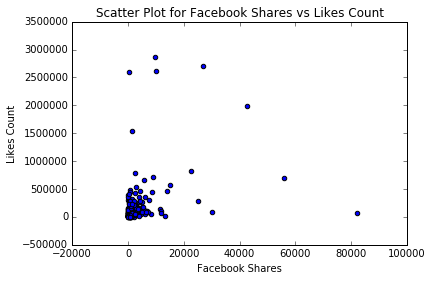

In [119]:
def twitterPlot(df):
    hits = df["twitterHits"]
    countries = df["twitterCountries"]
    vl = []
    ll = []
    for v,l in zip(hits,countries):
        if v<20000 and l<500000:
            vl.append(v)
            ll.append(l)
    plt.scatter(vl, ll)
    plt.xlabel('Facebook Shares')
    plt.ylabel('Likes Count')
    plt.title("Scatter Plot for Facebook Shares vs Likes Count")
    plt.show()
facebookCorelation(df)